In [1]:
import unifier

import pandas as pd
import numpy as np
import os
import mne
import hcp
import os

%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
def read_mous(subject: str, data_folder: str) -> mne.io.Raw:
    """
    Read a data file from the MOUS dataset, return a Raw instance
    """
    return read_mne(subject,data_folder,'{}/sub-{}_task-rest_meg.ds'.format(subject, subject))

        
def read_mne(subject: str, data_folder: str,sub_path : str) -> mne.io.Raw:
    """
    Read a mne data file
    """
    raw_path = os.path.join(data_folder, sub_path)
    raw = mne.io.read_raw_ctf(raw_path, preload=True)
    picks = mne.pick_types(raw.info, meg=True, eeg=False, stim=False, eog=True, exclude='bads') 
    raw.pick(picks)
    return raw


In [3]:
MOUS_FOLDER = os.getcwd() + "/MOUS"
sampleName = list(os.walk(MOUS_FOLDER))[0][1][1]
sample = read_mous(sampleName,MOUS_FOLDER)
PARTITIONS = 5

positions,polarPositions,partitions = unifier.spacialPartitionSensors(sample,PARTITIONS)

ds directory : /Users/billymihalarias/Documents/AHH Hackathon/MOUS/A2003/sub-A2003_task-rest_meg.ds
    res4 data read.
    hc data read.
    Separate EEG position data file not present.
    Quaternion matching (desired vs. transformed):
      -1.25   74.83    0.00 mm <->   -1.25   74.83    0.00 mm (orig :  -66.42   41.60 -251.37 mm) diff =    0.000 mm
       1.25  -74.83    0.00 mm <->    1.25  -74.83   -0.00 mm (orig :   38.06  -65.32 -243.66 mm) diff =    0.000 mm
     111.23    0.00    0.00 mm <->  111.23   -0.00    0.00 mm (orig :   65.78   64.53 -235.53 mm) diff =    0.000 mm
    Coordinate transformations established.
    Polhemus data for 3 HPI coils added
    Device coordinate locations for 3 HPI coils added
Picked positions of 8 EEG channels from channel info
    8 EEG locations added to Polhemus data.
    Measurement info composed.
Finding samples for /Users/billymihalarias/Documents/AHH Hackathon/MOUS/A2003/sub-A2003_task-rest_meg.ds/sub-A2003_task-rest_meg.meg4: 
    Syste

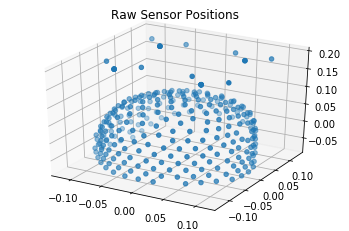

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(positions[:,0], positions[:,1], positions[:,2], cmap='Blues')
plt.title("Raw Sensor Positions")
None

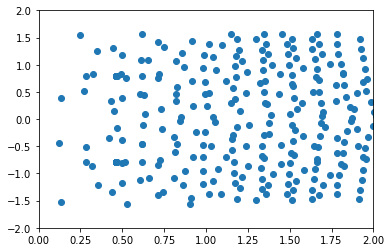

In [5]:
plt.scatter(x=polarPositions[:,0],y=polarPositions[:,1])
plt.xlim(0, 2)
plt.ylim(-2, 2)
plt.show()

In [6]:
cmap = {}

def addMap(e):
    cmap[tuple(e)] = np.random.rand(3)
    return cmap[tuple(e)]

groupCols = np.array([cmap[tuple(e)] if tuple(e) in cmap else addMap(e)  for e in partitions])

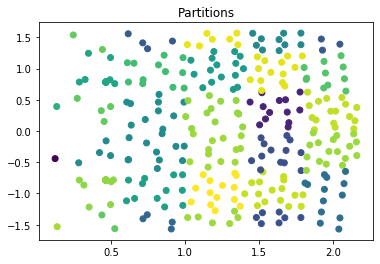

In [7]:
plt.scatter(x=polarPositions[:,0],y=polarPositions[:,1],c=groupCols[:,0])
plt.title("Partitions")
None